## IMPORTING PACKAGES/ MODULES/ LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score

import warnings
warnings.filterwarnings('ignore')

print("✅ Libraries imported successfully.")

✅ Libraries imported successfully.


## DATA COLLECTION

In [ ]:
# load dataset
# https://www.kaggle.com/datasets/purusinghvi/email-spam-classification-dataset (dataset source)

df = pd.read_csv('combined_data.csv') # replace with your dataset path

print("✅ Dataset Loaded Successfully!")
print(f"\n🎯 Dataset Shape: {df.shape}")
print(f"\n📊 First 5 Rows:\n{df.head()}")
print(f"\n📘 Dataset columns:\n{df.dtypes}")
print(f"\n❌ Missing values in each column:\n{df.isnull().sum()}")
print(f"\n🔢 Unique values in each column:\n{df.nunique()}")

✅ Dataset Loaded Successfully!

🎯 Dataset Shape: (83448, 2)

📊 First 5 Rows:
   label                                               text
0      1  ounce feather bowl hummingbird opec moment ala...
1      1  wulvob get your medircations online qnb ikud v...
2      0   computer connection from cnn com wednesday es...
3      1  university degree obtain a prosperous future m...
4      0  thanks for all your answers guys i know i shou...

📘 Dataset columns:
label     int64
text     object
dtype: object

❌ Missing values in each column:
label    0
text     0
dtype: int64

🔢 Unique values in each column:
label        2
text     83446
dtype: int64


In [3]:
df0 = df.copy() # for ML models
df1 = df.copy() # for transformer model

In [4]:
df0.sample(5)

,label,text
63833,1,"hello ,\nwe sent you an email a while ago , be..."
25530,0,"confirmation\nlenos ,\nthank you again for the..."
40106,1,accepted feb drug sexual assault survey eisler...
27464,0,hai gurus is there is availabilty of perl comp...
4398,0,mr . bayne :\nattached is the updated document...


## DATA PREPROCESING

In [5]:
import re

def preprocess_email(email):
    email = email.lower()
    email = re.sub(r"[^a-z0-9\s]", " ", email)  # remove punctuation
    email = re.sub(r"\s+", " ", email)          # remove extra spaces
    return email.strip()

df0['cleaned_text'] = df0['text'].apply(preprocess_email)

In [6]:
df0.head()

,label,text,cleaned_text
0,1,ounce feather bowl hummingbird opec moment ala...,ounce feather bowl hummingbird opec moment ala...
1,1,wulvob get your medircations online qnb ikud v...,wulvob get your medircations online qnb ikud v...
2,0,computer connection from cnn com wednesday es...,computer connection from cnn com wednesday esc...
3,1,university degree obtain a prosperous future m...,university degree obtain a prosperous future m...
4,0,thanks for all your answers guys i know i shou...,thanks for all your answers guys i know i shou...


## VISUALIZE

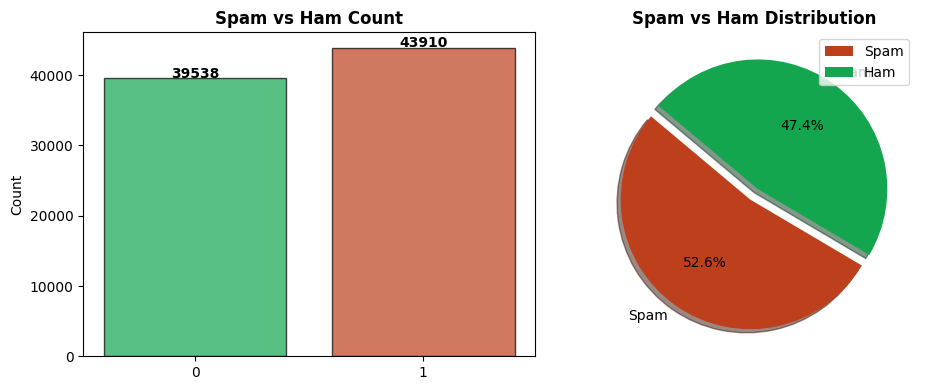

Spam Rate: 52.62%


In [7]:
# spam rate percentage in the dataset graph (value counts plot)

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

colors = ["#be3f1c", "#13A64E"]
spam_counts = df0['label'].value_counts()
labels = spam_counts.index

axes[0].bar(spam_counts.index, spam_counts.values, color=colors, alpha=0.7, edgecolor='black')
axes[0].set_title('Spam vs Ham Count', fontweight='bold')
axes[0].set_ylabel('Count')
axes[0].set_xticks(spam_counts.index)
for i, v in enumerate(spam_counts.sort_index().values):
    axes[0].text(i, v + 50, str(v), ha='center', fontweight='bold')

# pie chart

axes[1].pie(spam_counts, labels=spam_counts.index.map({ 0: 'Ham', 1: 'Spam'}), autopct='%1.1f%%', startangle=140, colors=colors, explode=(0.05, 0.05), shadow=True)
axes[1].set_title('Spam vs Ham Distribution', fontweight='bold')
axes[1].legend(labels.map({ 0: 'Ham', 1: 'Spam'}), loc='upper right')


plt.tight_layout()
plt.show()

# spam rate percentage in the dataset
print(f"Spam Rate: {df0.query('label == 1').shape[0] / len(df0) * 100:.2f}%")



## TRAIN-TEST SPLIT

In [8]:
from sklearn.model_selection import train_test_split

X = df0['cleaned_text']
y = df0['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y) 
# Stratify means to split the data in such a way that the proportion of classes in the train and test sets is the same as in the original dataset.

TF-IDF means Term Frequency-Inverse Document Frequency. 
It is a statistical measure used to evaluate the importance of a word in a document relative to a collection of documents (corpus). 
The TF-IDF value increases proportionally to the number of times a word appears in the document 
but is offset by the frequency of the word in the corpus, helping to adjust for the fact that some words are generally more common than others.

In [9]:
# Use TF-IDF or Word Embeddings (Word2Vec, BERT, etc.) to convert text into vectors.

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(
    max_features=5000,
    ngram_range=(1, 2),
    stop_words='english',
    min_df=2 # minimum document frequency - the term must appear in at least 2 documents to be included in the vocabulary
)

X_train_vectors = vectorizer.fit_transform(X_train)
X_test_vectors = vectorizer.transform(X_test)

In [29]:
# Baseline model → TF-IDF + Naive Bayes

from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train_vectors, y_train)
y_pred_naive = nb.predict(X_test_vectors)
print("\n✅ Naive Bayes Results:\n")
print(f'-'*70)
print(classification_report(y_test, y_pred_naive))
print(confusion_matrix(y_test, y_pred_naive))
print(f'-'*70)


✅ Naive Bayes Results:

----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      0.97      0.96      7908
           1       0.97      0.97      0.97      8782

    accuracy                           0.97     16690
   macro avg       0.97      0.97      0.97     16690
weighted avg       0.97      0.97      0.97     16690

[[7641  267]
 [ 298 8484]]
----------------------------------------------------------------------


In [11]:
# train a simple model like Logistic Regression

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_vectors, y_train)

LogisticRegression(max_iter=1000)

In [12]:
# train a SVM model

from sklearn.svm import LinearSVC
svm = LinearSVC()
svm.fit(X_train_vectors, y_train)

LinearSVC()

In [14]:
# evaluate the models

y_pred_lr = lr.predict(X_test_vectors)

print("\n✅ Logistic Regression Results:\n")
print(f'-'*70)
print(classification_report(y_test, y_pred_lr))
print(confusion_matrix(y_test, y_pred_lr))
print(f'-'*70)

y_pred_svm = svm.predict(X_test_vectors)

print("\n✅ Support Vector Machine Results:\n")
print(f'-'*70)
print(classification_report(y_test, y_pred_svm))
print(confusion_matrix(y_test, y_pred_svm))
print(f'-'*70)


✅ Logistic Regression Results:

----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      7908
           1       0.98      0.99      0.98      8782

    accuracy                           0.98     16690
   macro avg       0.98      0.98      0.98     16690
weighted avg       0.98      0.98      0.98     16690

[[7731  177]
 [ 112 8670]]
----------------------------------------------------------------------

✅ Support Vector Machine Results:

----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      7908
           1       0.98      0.99      0.99      8782

    accuracy                           0.99     16690
   macro avg       0.99      0.99      0.99     16690
weighted avg       0.99      0.99      0.99     16690

[[7766  142]
 [  84 8698]]
----------

In [15]:
# table score comparison
for model_name, y_pred in [("Naive Bayes", y_pred_naive), ("Logistic Regression", y_pred_lr), ("SVM", y_pred_svm)]:
    print(f"\n📊 {model_name} Performance Metrics:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred, average='weighted'):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred, average='weighted'):.4f}")
    print(f"F1 Score: {f1_score(y_test, y_pred, average='weighted'):.4f}")


📊 Naive Bayes Performance Metrics:
Accuracy: 0.9661
Precision: 0.9662
Recall: 0.9661
F1 Score: 0.9662

📊 Logistic Regression Performance Metrics:
Accuracy: 0.9827
Precision: 0.9827
Recall: 0.9827
F1 Score: 0.9827

📊 SVM Performance Metrics:
Accuracy: 0.9865
Precision: 0.9865
Recall: 0.9865
F1 Score: 0.9865


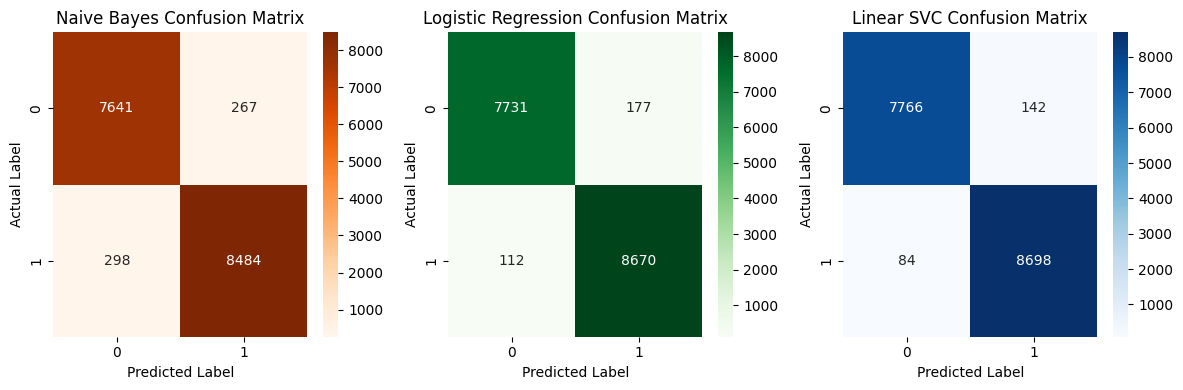

In [23]:
fig, ax = plt.subplots(1, 3, figsize=(12, 4))

# for all three models
for i, (model_name, y_pred) in enumerate([("Naive Bayes", y_pred_naive), ("Logistic Regression", y_pred_lr), ("Linear SVC", y_pred_svm)]):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues' if model_name == "Linear SVC" else 'Greens' if model_name == "Logistic Regression" else 'Oranges', ax=ax[i])
    ax[i].set_title(f'{model_name} Confusion Matrix')
    ax[i].set_xlabel('Predicted Label')
    ax[i].set_ylabel('Actual Label')

plt.tight_layout()
plt.show()

“I used minimal text preprocessing followed by TF-IDF with unigram and bigram features. 
This captures spam phrases efficiently without expensive lemmatization. Logistic Regression, Support Vector classifier provided strong performance with fast training.”

### BERT transformer model (STATE OF THE ART)

In [24]:
df1.head()

,label,text
0,1,ounce feather bowl hummingbird opec moment ala...
1,1,wulvob get your medircations online qnb ikud v...
2,0,computer connection from cnn com wednesday es...
3,1,university degree obtain a prosperous future m...
4,0,thanks for all your answers guys i know i shou...


In [25]:
# prepare data for BERT model

X = df1['text'].astype(str)
y = df1['label']

In [26]:
# train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
from transformers import BertTokenizer, BertModel

tokenizer = BertTokenizer.from_pretrained(
    r"", # specify the local path where the tokenizer files are stored
    local_files_only=True
)

model = BertModel.from_pretrained(
    r"", # specify the local path where the model files are stored
    local_files_only=True
)

print("✅ BERT loaded fully (tokenizer + model)")

✅ BERT loaded fully (tokenizer + model)


In [28]:
## still working on the BERT model part... happy learning!